In [35]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [87]:
df = pd.read_csv('Titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [88]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\abhay\AppData\Local\Temp\ipykernel_13820\2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [90]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

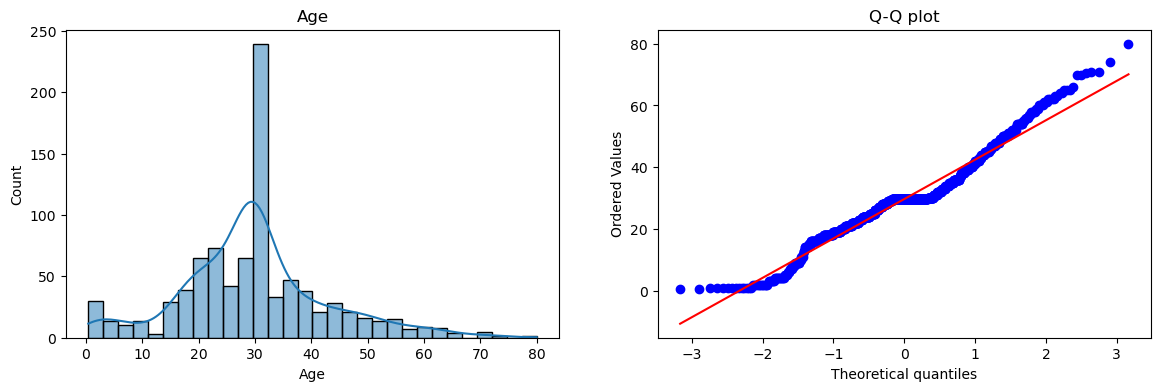

In [91]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde = True)
plt.title('Age')

plt.subplot(1,2,2)
probplot(df['Age'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()

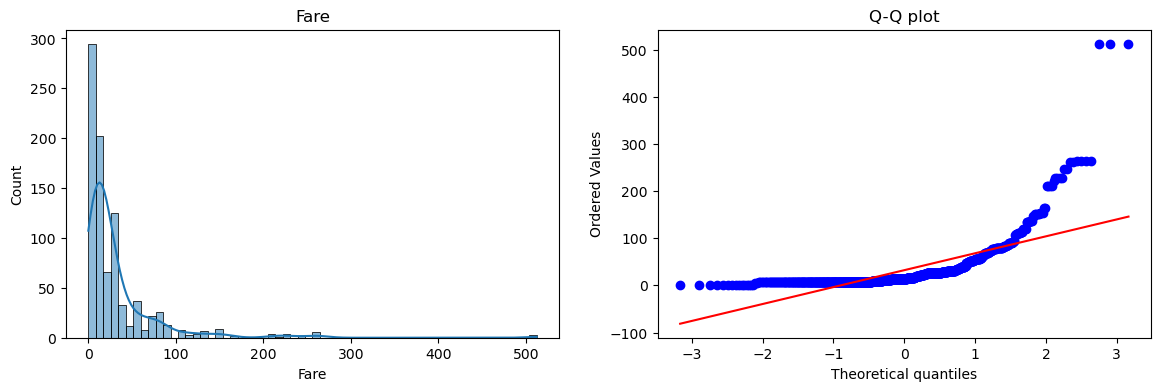

In [92]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(df['Fare'], kde = True)
plt.title('Fare')

plt.subplot(1,2,2)
probplot(df['Fare'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()

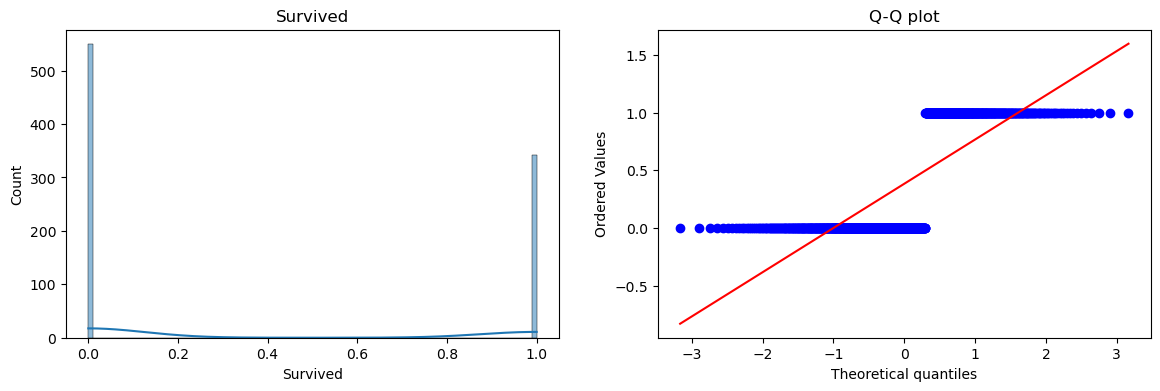

In [93]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(df['Survived'], kde = True, bins = 100)
plt.title('Survived')

plt.subplot(1,2,2)
probplot(df['Survived'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()

In [94]:
trf = FunctionTransformer(func = np.log1p)

In [97]:
newdf = trf.fit_transform(df.iloc[:,1:])

In [106]:
type(newdf)

pandas.core.frame.DataFrame

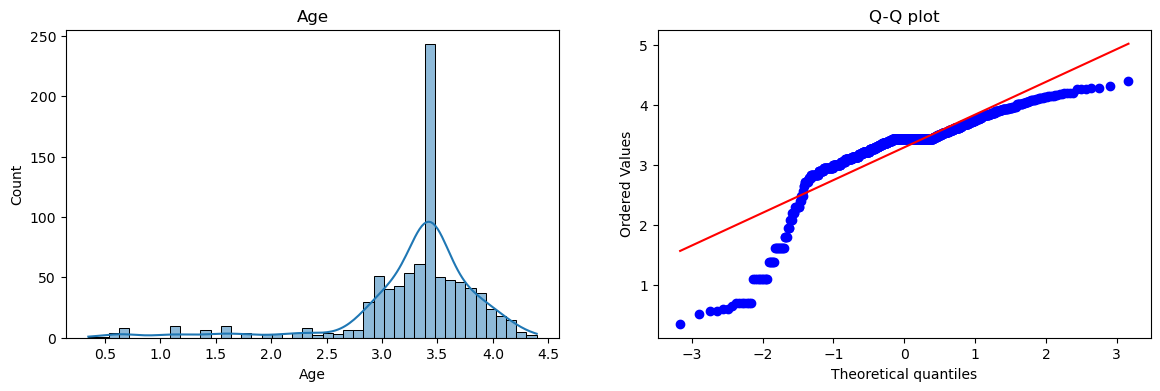

In [99]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(newdf['Age'], kde = True)
plt.title('Age')

plt.subplot(1,2,2)
probplot(newdf['Age'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()

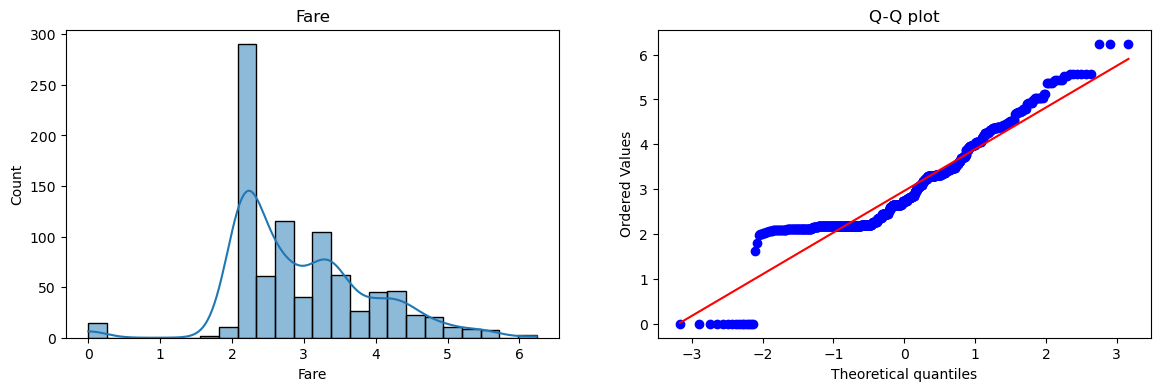

In [100]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(newdf['Fare'], kde = True)
plt.title('Fare')

plt.subplot(1,2,2)
probplot(newdf['Fare'], dist = 'norm', plot = plt)
plt.title('Q-Q plot')

plt.show()

In [101]:
# Above two graphs are showing that fare almost becomes normal from before because fare is right skewed..

In [125]:
def apply_transform_QQplot(transform, col):
    trf = FunctionTransformer(func = transform)
    df[col].fillna(df[col].mean(), inplace = True)
    newdf = trf.fit_transform(df[col])
    newdf = pd.DataFrame(newdf, columns = [col])
    print(type(newdf))
    plt.figure(figsize = (14,4))
    plt.subplot(1,2,1)
    probplot(df[col], dist = 'norm', plot = plt)

    plt.subplot(1,2,2)
    probplot(newdf[col], dist = 'norm', plot = plt)
    plt.show()


C:\Users\abhay\AppData\Local\Temp\ipykernel_13820\1022069982.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace = True)


<class 'pandas.core.frame.DataFrame'>


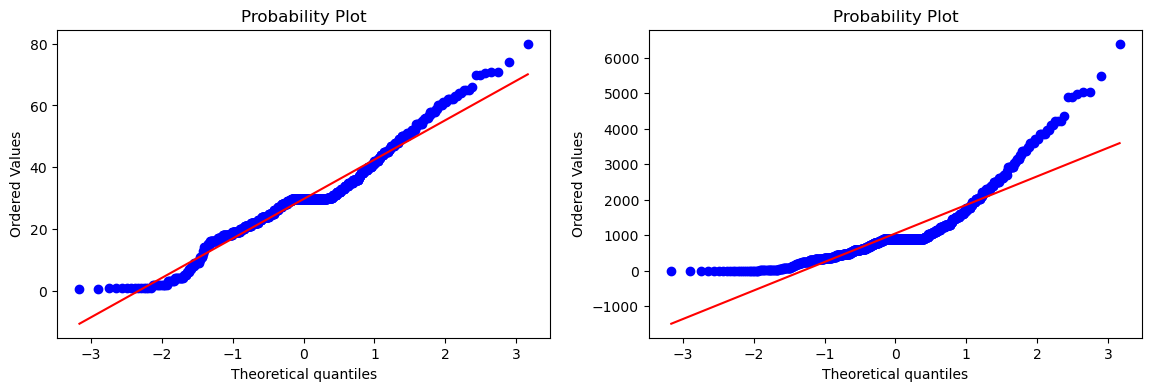

In [130]:
apply_transform_QQplot(lambda x: x**2, 'Age')